In [25]:
def matrixplot(start_date,end_date,type,term,flag=True): 
    # Configure plotting in Jupyter
    from matplotlib import pyplot as plt
    %matplotlib inline
    plt.rcParams.update({
        'figure.figsize': (26, 15),
        'axes.spines.right': False,
        'axes.spines.left': False,
        'axes.spines.top': False,
        'axes.spines.bottom': False})
    plt.rcParams['font.sans-serif'] = ['SimHei']
    # Seed random number generator
    from numpy import random as nprand
    seed = hash("Network Science in Python") % 2**32
    nprand.seed(seed)
    import datetime
    import pandas as pd
    import numpy as np
    import seaborn as sns
    from sqlalchemy import create_engine
    conn=create_engine('mysql+pymysql://root:lv+7)!@@SHZX@localhost:3306/pledge?charset=gbk')
    if term=="all":
        sql_query = "select * from trading_data where date_format(日切日期,'%%Y/%%m/%%d')>='{20}' and date_format(日切日期,'%%Y/%%m/%%d')<='{21}' and (正回购方机构类别 = '{2}{0}{3}{0}{4}{0}{5}{0}{6}{0}{7}{0}{8}{0}{9}{0}{10}{0}{11}{0}{12}{0}{13}{0}{14}{0}{15}{0}{16}{0}{17}{0}{18}{0}{19}') and (逆回购方机构类别 = '{2}{1}{3}{1}{4}{1}{5}{1}{6}{1}{7}{1}{8}{1}{9}{1}{10}{1}{11}{1}{12}{1}{13}{1}{14}{1}{15}{1}{16}{1}{17}{1}{18}{1}{19}')"\
        .format("' or 正回购方机构类别 = '","' or 逆回购方机构类别 = '",'政策性银行','国有控股商业银行','股份制商业银行','城市商业银行','农商行和农合行','村镇银行',\
                '城信社及联社','农信社及联社','邮政储蓄银行','财务公司','信托公司','资产管理公司','证券公司','期货公司','基金公司',\
                '保险公司','保险资产管理公司','保险经纪公司',start_date,end_date)
    else:
        sql_query = "select * from trading_data where date_format(日切日期,'%%Y/%%m/%%d')>='{20}' and date_format(日切日期,'%%Y/%%m/%%d')<='{21}' and 回购天数 = {22} and (正回购方机构类别 = '{2}{0}{3}{0}{4}{0}{5}{0}{6}{0}{7}{0}{8}{0}{9}{0}{10}{0}{11}{0}{12}{0}{13}{0}{14}{0}{15}{0}{16}{0}{17}{0}{18}{0}{19}') and (逆回购方机构类别 = '{2}{1}{3}{1}{4}{1}{5}{1}{6}{1}{7}{1}{8}{1}{9}{1}{10}{1}{11}{1}{12}{1}{13}{1}{14}{1}{15}{1}{16}{1}{17}{1}{18}{1}{19}')"\
        .format("' or 正回购方机构类别 = '","' or 逆回购方机构类别 = '",'政策性银行','国有控股商业银行','股份制商业银行','城市商业银行','农商行和农合行','村镇银行',\
                '城信社及联社','农信社及联社','邮政储蓄银行','财务公司','信托公司','资产管理公司','证券公司','期货公司','基金公司',\
                '保险公司','保险资产管理公司','保险经纪公司',start_date,end_date,term)
    df = pd.read_sql(sql_query,con=conn)
    title = list(df.columns)
    date_idx=title.index('日切日期')
    buyertype_idx=title.index('正回购方机构类别')
    sellertype_idx=title.index('逆回购方机构类别')
    amount_idx=title.index('首期结算金额（亿元）')
    rate_idx=title.index('到期预计收益率（%）')
    #建立四大类字典
    classify_key=['政策性银行','国有控股商业银行','股份制商业银行','城市商业银行','农商行和农合行','村镇银行','城信社及联社',\
                  '农信社及联社','邮政储蓄银行','财务公司','信托公司','资产管理公司','证券公司','期货公司','基金公司','保险公司',\
                  '保险资产管理公司','保险经纪公司']
    classify_value=['大行','大行','大行','中行','中行','小行','小行','小行','大行','非银','非银','非银','非银','非银','非银','非银',\
                    '非银','非银']
    classify=dict(zip(classify_key,classify_value))
#     for i in range(len(df)):
#         if df.iloc[i,buyertype_idx] not in classify_key or df.iloc[i,sellertype_idx] not in classify_key:
#             df.drop([i])
    #flag=FALSE表示四大类分类
    if flag:
        typelist=['政策性银行','国有控股商业银行','股份制商业银行','城市商业银行','农商行和农合行','村镇银行','城信社及联社',\
                  '农信社及联社','邮政储蓄银行','财务公司','信托公司','资产管理公司','证券公司','期货公司','基金公司','保险公司',\
                  '保险资产管理公司','保险经纪公司']
    else:
        typelist=['大行','中行','小行','非银']
        for i in range(len(df)):
            temp=df.iloc[i,buyertype_idx]
            df.iloc[i,buyertype_idx]=classify[temp]
            temp=df.iloc[i,sellertype_idx]
            df.iloc[i,sellertype_idx]=classify[temp]
    matrix = pd.DataFrame(np.zeros((len(typelist),len(typelist)),dtype=float),index=typelist,columns=typelist)
    start_date = datetime.datetime.strptime(start_date,'%Y/%m/%d')
    end_date = datetime.datetime.strptime(end_date,'%Y/%m/%d')
    if type=="amount":
        for i in range(len(df)):
            trade_date=datetime.datetime.strptime(df.iloc[i,date_idx],'%Y/%m/%d')
            if trade_date>=start_date and trade_date<=end_date:        
                matrix.loc[df.iloc[i,buyertype_idx],df.iloc[i,sellertype_idx]]+=float(df.iloc[i,amount_idx])
    elif type=="rate":        
        rate_array=[]
        sum=0
        count=0
        all_rate=[]
        for i in range(len(typelist)):
            sub_array = []
            for j in range(len(typelist)):
                sub_array.append([])
            rate_array.append(sub_array)
        for i in range(len(df)):
            trade_date=datetime.datetime.strptime(df.iloc[i,date_idx],'%Y/%m/%d')
            if trade_date>=start_date and trade_date<=end_date:
                rate_array[typelist.index(df.iloc[i,buyertype_idx])][typelist.index(df.iloc[i,sellertype_idx])].append(df.iloc[i,rate_idx])
        for j in range(len(typelist)):
            for k in range(len(typelist)):
                all_rate.extend(rate_array[j][k])
        median=sorted(all_rate)[int(len(all_rate)/2)]
        for j in range(len(typelist)):
            for k in range(len(typelist)):
                if len(rate_array[j][k])==0:
                    matrix.iloc[j,k]=median
                else:
                    matrix.iloc[j,k]=float(sorted(rate_array[j][k])[int(len(rate_array[j][k])/2)])
#     matrix[list(matrix.columns)]=matrix[list(matrix.columns)].astype(float)
    ax=sns.heatmap(matrix,cmap="YlGnBu",annot=True,fmt='.2f',linewidths=0.05,linecolor='white',annot_kws={'size':8,'weight':'bold'})
    ax.set_title('{0} {3} {1}~{2}'.format(type,start_date,end_date,term))
    ax.set_xlabel('逆回购方')
    ax.set_ylabel('正回购方')
    plt.show()

In [34]:
print("select min(`到期预计收益率（%）`) from trading_data where (正回购方机构类别 = '{2}{0}{3}{0}{4}{0}{5}{0}{6}{0}{7}{0}{8}{0}{9}{0}{10}{0}{11}{0}{12}{0}{13}{0}{14}{0}{15}{0}{16}{0}{17}{0}{18}{0}{19}') and (逆回购方机构类别 = '{2}{1}{3}{1}{4}{1}{5}{1}{6}{1}{7}{1}{8}{1}{9}{1}{10}{1}{11}{1}{12}{1}{13}{1}{14}{1}{15}{1}{16}{1}{17}{1}{18}{1}{19}')"\
        .format("' or 正回购方机构类别 = '","' or 逆回购方机构类别 = '",'政策性银行','国有控股商业银行','股份制商业银行','城市商业银行','农商行和农合行','村镇银行',\
                '城信社及联社','农信社及联社','邮政储蓄银行','财务公司','信托公司','资产管理公司','证券公司','期货公司','基金公司',\
                '保险公司','保险资产管理公司','保险经纪公司'))

select min(`到期预计收益率（%）`) from trading_data where (正回购方机构类别 = '政策性银行' or 正回购方机构类别 = '国有控股商业银行' or 正回购方机构类别 = '股份制商业银行' or 正回购方机构类别 = '城市商业银行' or 正回购方机构类别 = '农商行和农合行' or 正回购方机构类别 = '村镇银行' or 正回购方机构类别 = '城信社及联社' or 正回购方机构类别 = '农信社及联社' or 正回购方机构类别 = '邮政储蓄银行' or 正回购方机构类别 = '财务公司' or 正回购方机构类别 = '信托公司' or 正回购方机构类别 = '资产管理公司' or 正回购方机构类别 = '证券公司' or 正回购方机构类别 = '期货公司' or 正回购方机构类别 = '基金公司' or 正回购方机构类别 = '保险公司' or 正回购方机构类别 = '保险资产管理公司' or 正回购方机构类别 = '保险经纪公司') and (逆回购方机构类别 = '政策性银行' or 逆回购方机构类别 = '国有控股商业银行' or 逆回购方机构类别 = '股份制商业银行' or 逆回购方机构类别 = '城市商业银行' or 逆回购方机构类别 = '农商行和农合行' or 逆回购方机构类别 = '村镇银行' or 逆回购方机构类别 = '城信社及联社' or 逆回购方机构类别 = '农信社及联社' or 逆回购方机构类别 = '邮政储蓄银行' or 逆回购方机构类别 = '财务公司' or 逆回购方机构类别 = '信托公司' or 逆回购方机构类别 = '资产管理公司' or 逆回购方机构类别 = '证券公司' or 逆回购方机构类别 = '期货公司' or 逆回购方机构类别 = '基金公司' or 逆回购方机构类别 = '保险公司' or 逆回购方机构类别 = '保险资产管理公司' or 逆回购方机构类别 = '保险经纪公司')


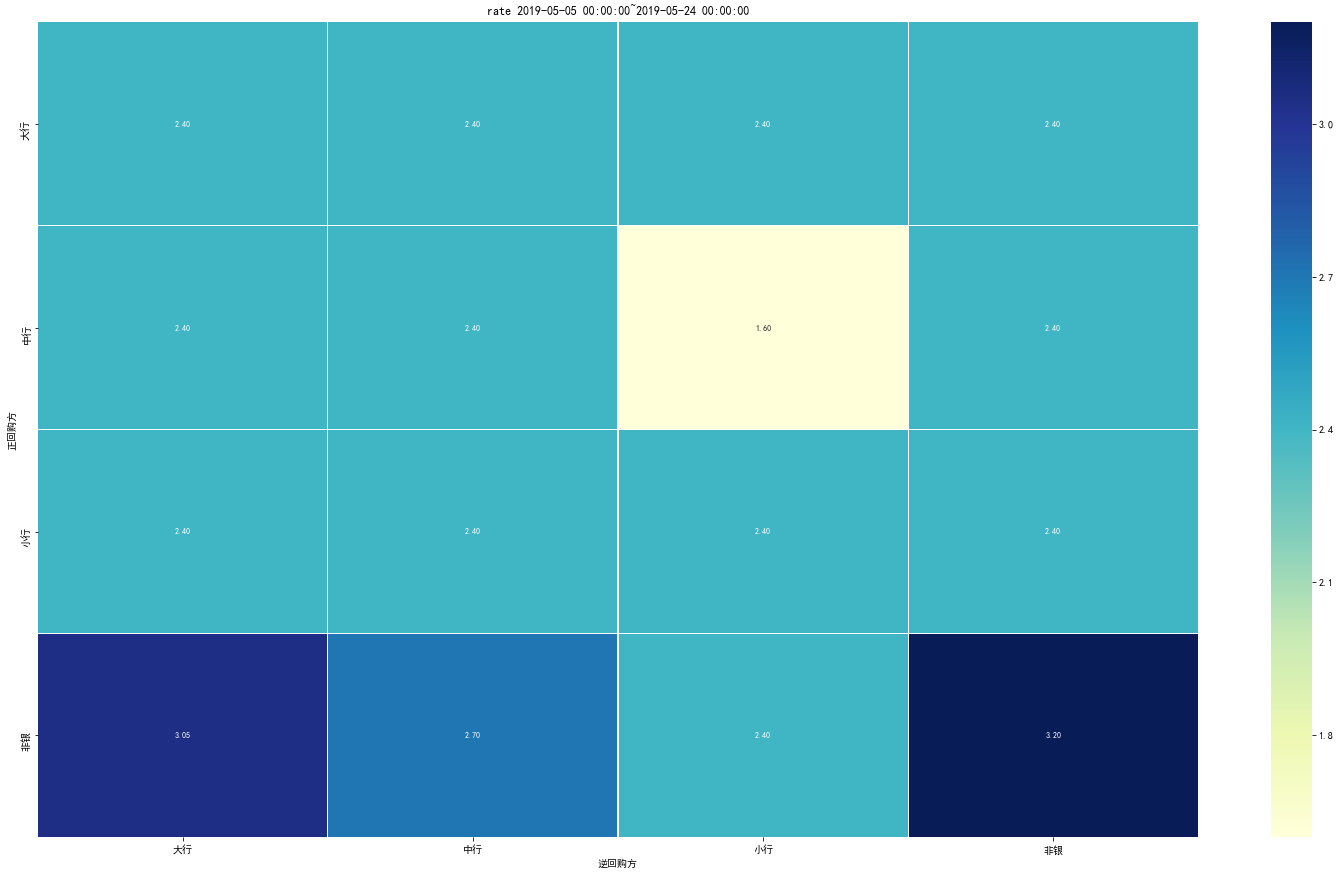

In [26]:
matrixplot("2019/05/05","2019/05/24",flag=False,type="rate",term=2)